<a href="https://colab.research.google.com/github/soyoonjeong/deeplearning_from_scratch/blob/main/ch4_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복
- 수치 미분 : 아주 작은 값을 주었을 때 차분으로 미분하는 것
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있음
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 한편 다음 장에서 구현하는 오차역전파법은 기울기를 고속으로 구할 수 있음 

In [ ]:
import numpy as np

# 데이터에서 학습한다!

- **학습** : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 결정하는 것 
- **손실함수** : 신경망이 학습할 수 있도록 해주는 지표 <br>
=> 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾아야 한다!

## 데이터 주도 학습 
규칙을 '사람'이 만드는 방식에서 '기계'가 데이터로부터 배우는 방식으로의 패러다임 전환

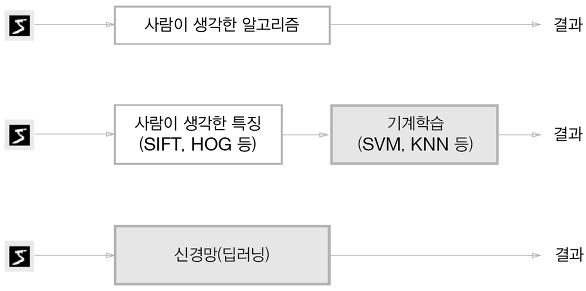

⭐ 사람이 설계한 특징을 이용하여 이미지 데이터를 벡터로 변환 -> 기계학습으로 변환된 벡터로부터 패턴을 찾음 <br>
**특징** : 입력 데이터에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기 

⭐ 신경망 : 모든 문제를 주어진 데이터 그대로 입력 데이터로 활용하여 end-to-end로 학습 <br>
이미지에 포함된 중요한 특징까지 주어진 데이터를 온전히 학습 -> 주어진 문제의 패턴을 발견 <br>


## 훈련 데이터와 시험 데이터

⭐ **범용적으로 사용할 수 있는 모델**을 만들어야 한다!  <br>
**범용능력** : 아직 보지 못한 데이터로도 문제를 올바르게 풀어내는 능력 <br>

범용능력을 제대로 평가하기 위해,<br>
**훈련 데이터**만 사용하여 학습하면서 최적의 매개변수를 찾음 <br>
-> **시험 데이터**를 사용하여 훈련한 모델의 성능 평가

# 손실 함수

신경망은 **손실 함수**를 기준으로 최적의 매개변수 값을 탐색 <br>
**손실 함수** : 신경망 성능의 '나쁨'을 나타내는 지표 

## 오차제곱합

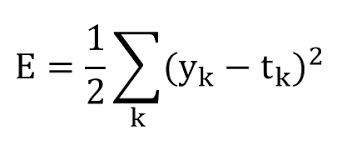

In [ ]:
def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t) ** 2)

In [ ]:
# 정답으로 예측한 확률이 제일 높은 경우 (예측을 잘한 경우)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1,0.0, 0.0] # 예측값

print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003


In [ ]:
# 정답으로 예측한 확률이 제일 높지 않은은 경우 (예측을 못한 경우)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6,0.0, 0.0] # 예측값

print(sum_squares_error(np.array(y), np.array(t)))

0.5975


예측을 잘한 경우 손실 함수 값이 낮고, 예측을 못한 경우 손실 함수 값이 높음

## 교차 엔트로피 오차 

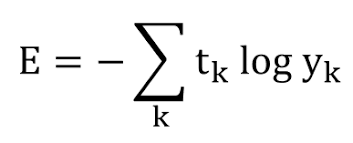

교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 됨 (t가 원-핫 인코딩 형태)

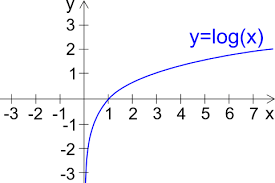

- 정답에 해당하는 출력이 커질수록 0에 다가감 (손실함수 값이 작아짐) 
- 정답에 해당하는 출력이 작아질수록 음의 무한대로 다가감 (손실함수 값이 커짐)

In [ ]:
def cross_entropy_error(y, t):
  delta = 1e-7 # log 0 예방
  return -np.sum(t*np.log(y+delta))

In [ ]:
# 정답으로 예측한 확률이 제일 높은 경우 (예측을 잘한 경우)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1,0.0, 0.0] # 예측값

print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338


In [ ]:
# 정답으로 예측한 확률이 제일 높지 않은은 경우 (예측을 못한 경우)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6,0.0, 0.0] # 예측값

print(cross_entropy_error(np.array(y), np.array(t)))

2.302584092994546


### 미니배치 학습

PROBLEM : 모든 데이터를 대상으로 손실 함수의 합을 구하려면 시간이 오래 걸림<br>
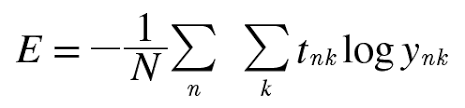 


SOLUTION : **미니배치 학습** <br>
데이터 일부를 추려 전체의 '근사치'로 이용용

In [ ]:
import sys

from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

## (배치용) 교차 엔트로피 오차 구현하기

In [ ]:
# 정답 레이블이 원-핫 인코딩이라면
def cross_entropy_error(y, t):
    if y.ndim == 1:
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7)) / batch_size

In [ ]:
# 정답 레이블이 원-핫 인코딩이 아니라면
def cross_entropy_error(y, t):
    if y.ndim == 1:
        y = y.reshape(1, y.size)
        t = t.reshpae(1, t.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.aranage(batch_size), t] + 1e-7)) / batch_size

## 왜 손실 함수를 설정하는가?

**Q. '정확도'라는 지표를 놔두고 '손실 함수의 값'이라는 우회적인 방법을 택하는 이유는 뭘까요?**


- **정확도** : 매개변수의 미세한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화 <br>
    => 미분 값이 대부분의 장소에서 0이어서 매개변수 갱신할 수 없음<br>
    => '계단 함수'를 활성화 함수로 사용하지 않는 이유 : 매개변수의 작은 변화가 주는 파장을 계단 함수가 말살<br>
    

- **손실 함수의 값** : 매개변수의 미세한 변화에도 반응을 보이고 손실 함수의 값이 연속적으로 변화 <br>
    => 매개변수의 미분(기울기)를 계산하고 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하여 손실 함수의 값 줄여감 <br>
    - 미분 값 음수 : 가중치의 매개변수를 양의 방향으로 변화 
    - 미분 값 양수 : 가중치의 매개변수를 음의 방향으로 변화
    - 미분 값 0 : 어느쪽으로 움직여도 손실 함수 값 줄어들지 않음 

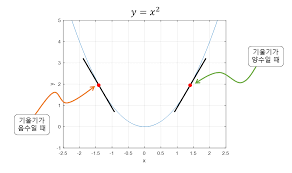

# 수치 미분

## 미분

: '특정 순간'의 변화량 <br>
x의 '작은 변화'가 함수 f(x)를 얼마나 변화시키느냐 <br>
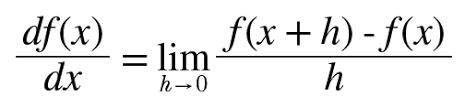

In [ ]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h)-f(x))/h
# 반올림 오차 문제 
# 진정한 미분은 아님, x+h와 x 사이의 기울기일뿐

In [ ]:
# 중심심 차분
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)- f(x-h))/(2*h)

## 수치 미분의 예

In [ ]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

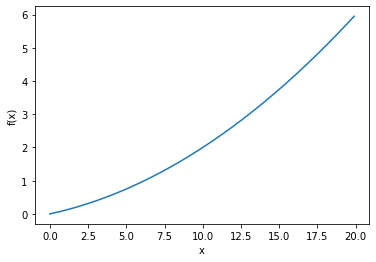

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
print(numerical_diff(function_1, 5)) # 2

0.1999999999990898


In [ ]:
print(numerical_diff(function_1, 10)) # 3

0.2999999999986347


## 편미분

특정 장소의 기울기를 구하되 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정

In [ ]:
def function_2(x):
  return x[0] ** 2 + x[1] ** 2

In [ ]:
def function_tmp1(x0): # x0에 대한 미분
  return x0 * x0 + 4 ** 2

print(numerical_diff(function_tmp1, 3))

6.00000000000378


In [ ]:
def function_tmp2(x1): # x1에 대한 미분
  return 3 ** 2 + x1 ** 2

print(numerical_diff(function_tmp2, 4))

7.999999999999119


# 기울기 

In [ ]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]
    x[idx] = tmp_val + h
    fxh1 = f(x)

    x[idx] = tmp_val - h
    fxh2 = f(x)
    
    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

In [ ]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

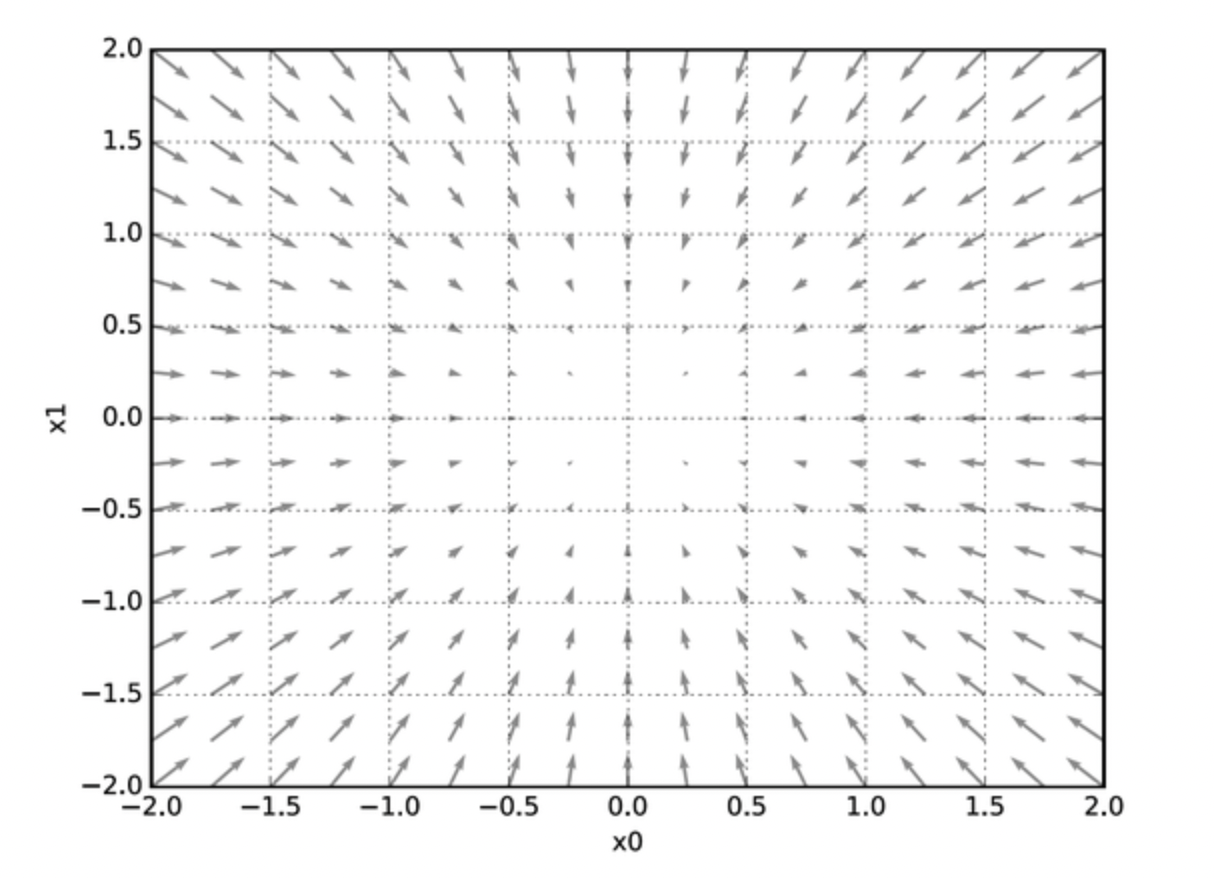

- 기울기는 함수의 가장 낮은 장소(최솟값)을 가리킴
- 가장 낮은 곳에서 멀어질수록 화살표의 크기가 커짐 

⭐ 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향 !

## 경사법(경사 하강법)

: 기울기를 이용하여 함수의 최솟값을 찾으려는 방법<br>
현 위치에서 기울어진 방향으로 일정 거리만큼 이동 <br>
-> 이동한 곳에서 기울기를 구해서 기울어진 방향으로 일정 거리만큼 이동 <br>
-> ...

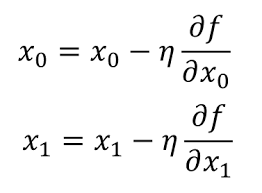

변수의 값을 갱신하는 단계를 여러 번 반복하면서 서서히 함수의 값 줄임 

In [ ]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad # 학습률 * 기울기만큼 이동 
  return x

In [ ]:
def function_2(x):
  return x[0] ** 2 + x[1] ** 2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

값이 가장 낮은 장소인 원점에 가까워지고 있음 (0, 0)

- 학습률이 너무 크면 : 큰 값으로 발산
- 학습률이 너무 작으면 : 갱신되지 않은 채 끝남 

+) 학습률과 같은 사람이 직접 설정해야 하는 매개변수를 **하이퍼 파라미터**라고 함 

In [ ]:
# 학습률이 너무 큰 예시 
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 10.0 , step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [ ]:
# 학습률이 너무 작은 예시 
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 1e-10 , step_num = 100)

array([-2.99999994,  3.99999992])

## 신경망에서의 기울기 

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))   
    
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [ ]:
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3)

  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    return cross_entropy_error(y, t)

In [ ]:
net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

print(np.argmax(p))

[[-0.41162669  0.24724445 -0.93137539]
 [ 1.66395209  1.40736688 -1.49894943]]
[ 1.25058086  1.41497686 -1.90787972]
1


In [ ]:
t = np.array([0, 1, 0])
net.loss(x, t)

[0.45021275 0.53065721 0.01913004]


0.6336388350959866

In [ ]:
def f(W):
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[0.45022761 0.53064287 0.01912952]
[0.4501979  0.53067154 0.01913055]
[0.45019842 0.53067215 0.01912943]
[0.45022709 0.53064227 0.01913065]
[0.45021224 0.5306566  0.01913116]
[0.45021327 0.53065782 0.01912891]
[0.45023503 0.53063571 0.01912926]
[0.45019048 0.53067871 0.01913081]
[0.45019125 0.53067962 0.01912912]
[0.45023426 0.53063479 0.01913095]
[0.45021198 0.5306563  0.01913172]
[0.45021353 0.53065812 0.01912835]
[[ 0.2701276  -0.28160562  0.01147802]
 [ 0.4051914  -0.42240843  0.01721703]]


# 학습 알고리즘 구현하기 

**확률적 경사 하강법(SGD)** : '확률적으로 무작위로 골라낸 데이터'에 대해 수행하는 경사 하강법 <BR>
1. 미니 배치 : 훈련 데이터 중 일부를 무작위로 가져옴
2. 기울기 산출 : 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함
3. 매개변수 갱신 : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
4. 1~3단계 반복

## 2층 신경망 클래스 구현하기 

In [ ]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  def loss(self, x, t):
    y = self.predict(x)
    return cross_entropy_error(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis = 1)
    t = np.argmax(t, axis = 1)
    
    accuracy = np.sum(y == t) / float(x.shape[0])

    return accuracy
  
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

In [ ]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)

print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [ ]:
x = np.random.rand(100, 784) # 100개의 더미 데이터
y = net.predict(x)
t = np.random.rand(100, 10) 

grads = net.numerical_gradient(x, t)
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


## 미니배치 학습 구현하기 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = "/content/drive/MyDrive/dataset"
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기
    
    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label : 
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다. 
    
    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

train_loss_list = []

iters_num = 100
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  grad = network.numerical_gradient(x_batch, t_batch)

  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

KeyboardInterrupt: ignored

## 시험 데이터로 평가하기 